In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/Student_performance_data _.csv")

In [2]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<Axes: ylabel='GradeClass'>

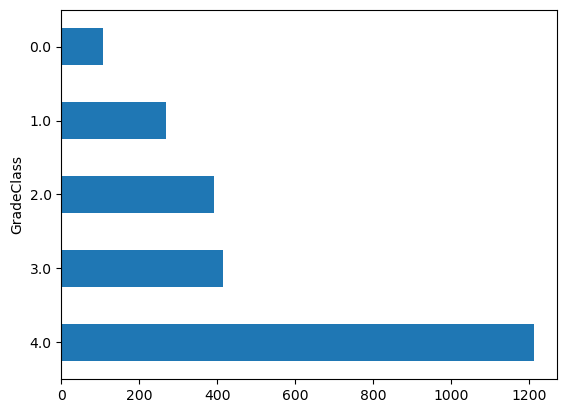

In [3]:
data.GradeClass.value_counts().plot.barh()

In [4]:
df_0 = data[(data.GradeClass == 0)]
df_1 = data[(data.GradeClass == 1)]
df_2 = data[(data.GradeClass == 2)]
df_3 = data[(data.GradeClass == 3)]
df_4 = data[(data.GradeClass == 4)]
print(f'grade 0: {df_0.shape}')
print(f'grade 1: {df_1.shape}')

print(f'grade 2: {df_2.shape}')
print(f'grade 3: {df_3.shape}')
print(f'grade 4: {df_4.shape}')


grade 0: (107, 15)
grade 1: (269, 15)
grade 2: (391, 15)
grade 3: (414, 15)
grade 4: (1211, 15)


In [5]:
def create_df(dx):
    df = dx.drop(['GradeClass','StudentID','Age'],axis = 1).sum().to_frame('value')
    df = df.sort_values(by = 'value',ascending = False)
    df = df[(df.T != 0).any()]
    return df

Text(0.5, 1.0, 'Variables influencing Grade  0')

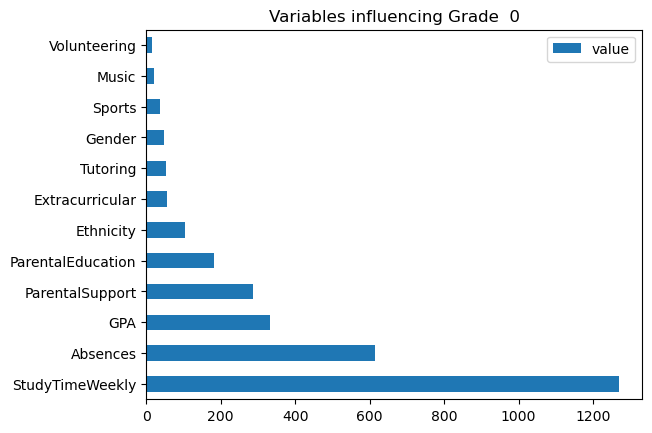

In [6]:
valuedf_0 = create_df(df_0)
valuedf_0.plot.barh()
plt.title('Variables influencing Grade  0')

Text(0.5, 1.0, 'Variables influencing Grade  1')

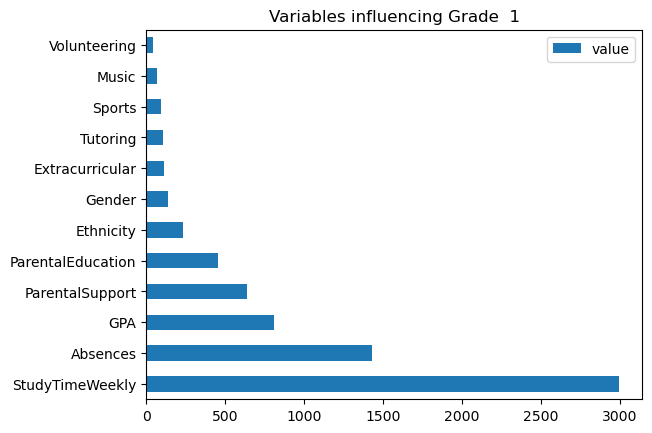

In [7]:
valuedf_1 = create_df(df_1)
valuedf_1.plot.barh()
plt.title('Variables influencing Grade  1')

Text(0.5, 1.0, 'Variables influencing Grade  2')

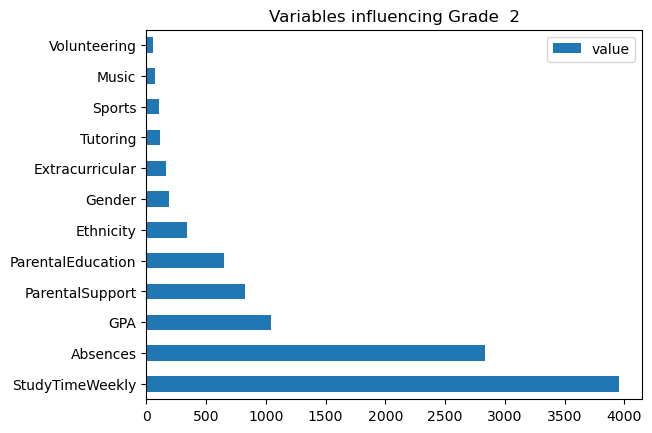

In [8]:
valuedf_2 = create_df(df_2)
valuedf_2.plot.barh()
plt.title('Variables influencing Grade  2')

Text(0.5, 1.0, 'Variables influencing Grade  3')

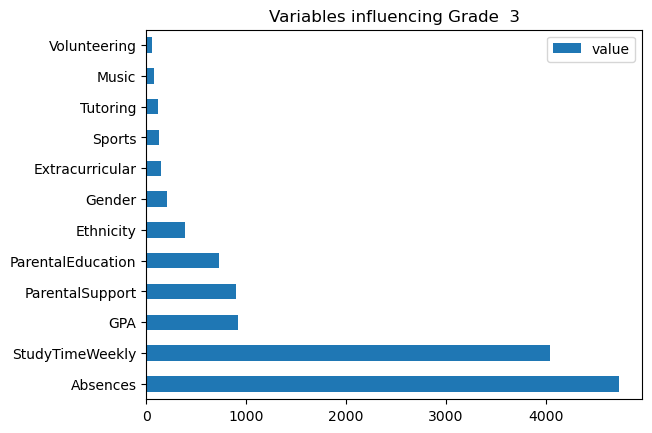

In [9]:
valuedf_3 = create_df(df_3)
valuedf_3.plot.barh()
plt.title('Variables influencing Grade  3')


Text(0.5, 1.0, 'Variables influencing Grade  4')

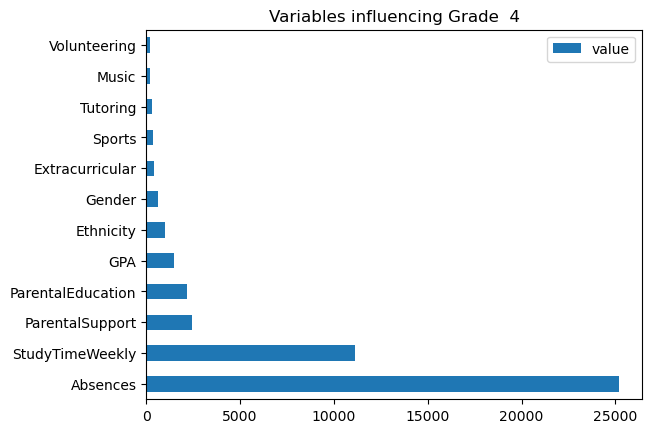

In [10]:
valuedf_4 = create_df(df_4)
valuedf_4.plot.barh()
plt.title('Variables influencing Grade  4')


In [11]:
feature_df = data.drop(['GradeClass','StudentID','Age'],axis = 1)
label_df = data.GradeClass

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df , transformed_label_df = oversample.fit_resample(feature_df,label_df)
print(f'normal: {label_df.value_counts()}')
print(f'transformed: {transformed_label_df.value_counts()}')

normal: GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64
transformed: GradeClass
2.0    1211
1.0    1211
4.0    1211
3.0    1211
0.0    1211
Name: count, dtype: int64


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_feature_df,transformed_label_df,test_size = 0.3,random_state = 42)

In [14]:
model = LogisticRegression(multi_class = 'ovr',solver = 'liblinear')
model.fit(X_train,y_train.ravel())
acc = model.score(X_test,y_test)
print(f'Accuracy: {acc:.2%}')

Accuracy: 54.87%


In [15]:
print(f'values: {X_test.iloc[50][X_test.iloc[50] != 0].keys()}')
print(f'class : {y_test.iloc[50]}')

values: Index(['Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
       'ParentalSupport', 'Extracurricular', 'GPA'],
      dtype='object')
class : 3.0


In [16]:
test = X_test.iloc[50].values.reshape(-1,1).T
p = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data =p,columns = classes)
resultdf.T.sort_values(by = [0],ascending = False)

C:\Users\AKASH HN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
0.0,0.304502
3.0,0.269564
2.0,0.193683
4.0,0.118240
1.0,0.114010


In [17]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.41      0.54      0.47       361
         1.0       0.49      0.42      0.45       348
         2.0       0.54      0.42      0.47       385
         3.0       0.60      0.43      0.50       354
         4.0       0.69      0.93      0.79       369

    accuracy                           0.55      1817
   macro avg       0.55      0.55      0.54      1817
weighted avg       0.55      0.55      0.54      1817

